In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
from fitting.linear import fit as linear_fit
from uncertainty_to_string import uncertainty_to_string as unc

<IPython.core.display.Javascript object>


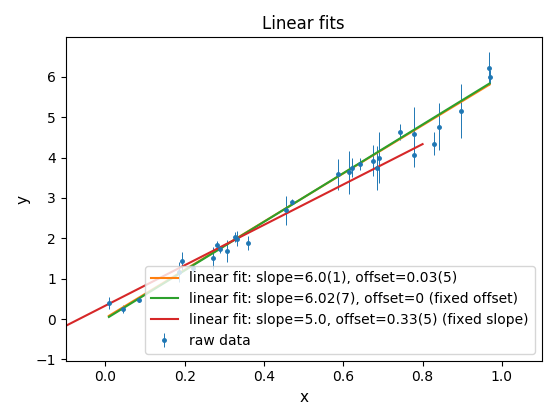

In [3]:
"""Fit arbitrary functions on-the-fly"""
x = np.random.rand(30)
y = (5+np.random.rand(len(x)))*x + 0.5*np.random.rand(len(x))
y_err = 0.15*y*np.random.rand(len(x)) + 0.15*np.random.rand(len(x))


fig = plt.figure(figsize=(5.6, 4.2))
ax1 = fig.add_subplot("111")
ax1.set_title("Linear fits")
ax1.set_ylabel("y", fontsize=11)
ax1.set_xlabel("x", fontsize=11)
ax1.errorbar(x, y, y_err, fmt=".", linewidth=0.7, markersize=5, label="raw data")

fitp = linear_fit(x, y, y_err)
label = "linear fit: slope={}, offset={}".format(unc(fitp["slope"], fitp["slope_err"]), unc(fitp["offset"], fitp["offset_err"]))
ax1.plot(fitp["fitx"], fitp["fity"], label=label, linestyle="-")

fitp = linear_fit(x, y, y_err, offset=(False,0))
label = "linear fit: slope={}, offset={} (fixed offset)".format(unc(fitp["slope"], fitp["slope_err"]), unc(fitp["offset"], fitp["offset_err"]))
ax1.plot(fitp["fitx"], fitp["fity"], label=label, linestyle="-")

fitp = linear_fit(x, y, y_err, slope=(False,5), return_fit=[-0.2,0.3,0.8])
label = "linear fit: slope={}, offset={} (fixed slope)".format(unc(fitp["slope"], fitp["slope_err"]), unc(fitp["offset"], fitp["offset_err"]))
ax1.plot(fitp["fitx"], fitp["fity"], label=label, linestyle="-")

ax1.set_xlim([-0.1,1.1])
ax1.legend(loc="best")

plt.tight_layout()
plt.show()